# 분석 시작

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

art = pd.read_csv("data/articles_processed.csv")                 # 상품 메타데이터
cust = pd.read_csv("data/customer_processed.csv")               # 고객 메타데이터
total_revenue = pd.read_csv("data/total_revenue.csv")       # 매출 데이터

In [3]:
art.columns

Index(['Article_Id', 'Product_Code', 'Prod_Name', 'Product_Type_Info',
       'Product_Group_Name', 'Graphical_Appearance_Info',
       'Perceived_Colour_Master_Info', 'Department_Info', 'Index_Info',
       'Index_Group_Info', 'Section_Info', 'Garment_Group_Info'],
      dtype='object')

In [4]:
cust.columns

Index(['Customer_Id', 'Fn', 'Active', 'Club_Member_Status',
       'Fashion_News_Frequency', 'Age', 'Age_Group'],
      dtype='object')

In [5]:
total_revenue.columns

Index(['T_Dat', 'Customer_Id', 'Article_Id', 'Revenue', 'Sales_Channel_Id',
       'Month', 'Year_Month', 'Month_Day', 'Total_Revenue', 'Revenue_Group'],
      dtype='object')

In [6]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="Customer_Id", how="inner")
    .merge(art, on="Article_Id", how="inner")
)
analysis_master.shape

(804149, 27)

In [7]:
(804149, 25)

(804149, 25)

In [8]:
analysis_master.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,...,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,...,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,...,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,...,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,...,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,...,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


In [9]:
analysis_master.columns

Index(['T_Dat', 'Customer_Id', 'Article_Id', 'Revenue', 'Sales_Channel_Id',
       'Month', 'Year_Month', 'Month_Day', 'Total_Revenue', 'Revenue_Group',
       'Fn', 'Active', 'Club_Member_Status', 'Fashion_News_Frequency', 'Age',
       'Age_Group', 'Product_Code', 'Prod_Name', 'Product_Type_Info',
       'Product_Group_Name', 'Graphical_Appearance_Info',
       'Perceived_Colour_Master_Info', 'Department_Info', 'Index_Info',
       'Index_Group_Info', 'Section_Info', 'Garment_Group_Info'],
      dtype='object')

- 없는 컬럼
    - Day_name

- 있는 컬럼
    - Year_Month == 년/월
    - Month_Day == 월/일
    - Total_Revenue == 고객의 총 구매가격

# 다른 이름의 컬럼
    - Price = Revenue
    - Segment= Revenue_Group

In [10]:
# 실제 분석용 데이터프레임
analysis_christmas = analysis_master[
    [
        # 키
        "Customer_Id", "Article_Id",
        # 시간
        "Year_Month", "Month", "Month_Day",
        # 거래
        "Revenue", "Sales_Channel_Id",
        # 고객
        "Age_Group", "Revenue_Group", "Club_Member_Status", "Fn", "Active", # FN: 뉴스 구독, club_member_status: 팬클럽 가입여부
        # 상품 특성 (크리스마스 분석 핵심)
        "Product_Group_Name", "Garment_Group_Info", "Product_Type_Info",
        "Graphical_Appearance_Info",                 # 패턴
        "Perceived_Colour_Master_Info",    # (색상은 조원 담당이지만 보조로 남겨도 됨)
        "Section_Info", "Index_Group_Info",

    ]
].copy()

11월~2월 겨울 시즌 

In [48]:
analysis_master['Is_Winter'] = analysis_master['Month'].isin([11, 12, 1, 2])

In [77]:
winter_df = analysis_master[analysis_master['Month'].astype(int).isin([11, 12, 1, 2])]

In [78]:
winter_df = analysis_master[analysis_master['Is_Winter'] == True]
winter_df

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,...,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Is_Winter
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,...,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005),True
7,2019-02-22,4c8c418805d81bd1d25d77659f227ac5570b154172ff8c...,651685004,0.016932,2,2,2019-02,02-22,0.016932,bottom_20,...,Trousers (272),Garment Lower body,All over pattern (1010001),Red (18),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),True
8,2019-02-22,0e5b7fc9a02c8d44a86575a66b571587fa5178f0705c7b...,751941002,0.036000,2,2,2019-02,02-22,0.172373,top_20,...,Trousers (272),Garment Lower body,Solid (1010016),Khaki green (20),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),True
9,2019-12-06,be3af45f57ca28c62d67fc7ae70b93c0a5bf9ba67e5793...,836327003,0.042356,2,12,2019-12,12-06,0.042356,middle,...,Leggings/Tights (273),Garment Lower body,Solid (1010016),Black (5),Ladies Sport Bottoms (8310),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),True
11,2019-11-08,5e7680cc75a00c44a7cc3b507404319c4409b95c458741...,749400009,0.016932,2,11,2019-11,11-08,0.425237,top_20,...,T-shirt (255),Garment Upper body,Solid (1010016),Black (5),Ladies Sport Bras (8316),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804122,2019-01-25,38809c16a6b321f6bebc07f468b0e525748cb3261f005a...,678697001,0.025407,2,1,2019-01,01-25,0.083831,middle,...,Bra (306),Underwear,Melange (1010010),Black (5),Ladies Sport Bras (8316),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),True
804130,2019-12-02,c6bfb68051626af7a926fbb07ee4c1257d7b4c01b84af5...,609301001,0.013542,2,12,2019-12,12-02,0.033864,middle,...,Bra (306),Underwear,Solid (1010016),Black (5),Casual Lingerie (1334),Lingeries/Tights (B),Ladieswear (1),Womens Lingerie (61),"Under-, Nightwear (1017)",True
804134,2019-01-05,6163f2b749ca07fd299dad670c39ada54504344683aabe...,657323003,0.024390,1,1,2019-01,01-05,0.024390,middle,...,Sweater (252),Garment Upper body,Solid (1010016),Red (18),Knitwear (1610),Ladieswear (A),Ladieswear (1),Womens Casual (6),Knitwear (1003),True
804143,2019-01-23,9a34b77f0d5f7aa03ff810e47fdf64be1557cf9fb0fe87...,577675001,0.023712,2,1,2019-01,01-23,0.254169,top_20,...,Vest top (253),Garment Upper body,Solid (1010016),Black (5),Blouse (1522),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Blouses (1010),True


In [53]:
winter_df.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,...,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Is_Winter
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,...,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005),True
7,2019-02-22,4c8c418805d81bd1d25d77659f227ac5570b154172ff8c...,651685004,0.016932,2,2,2019-02,02-22,0.016932,bottom_20,...,Trousers (272),Garment Lower body,All over pattern (1010001),Red (18),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),True
8,2019-02-22,0e5b7fc9a02c8d44a86575a66b571587fa5178f0705c7b...,751941002,0.036000,2,2,2019-02,02-22,0.172373,top_20,...,Trousers (272),Garment Lower body,Solid (1010016),Khaki green (20),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),True
9,2019-12-06,be3af45f57ca28c62d67fc7ae70b93c0a5bf9ba67e5793...,836327003,0.042356,2,12,2019-12,12-06,0.042356,middle,...,Leggings/Tights (273),Garment Lower body,Solid (1010016),Black (5),Ladies Sport Bottoms (8310),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),True
11,2019-11-08,5e7680cc75a00c44a7cc3b507404319c4409b95c458741...,749400009,0.016932,2,11,2019-11,11-08,0.425237,top_20,...,T-shirt (255),Garment Upper body,Solid (1010016),Black (5),Ladies Sport Bras (8316),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),True


TOP 5 VS BOTTOM 5 상품 비교

1. 컬럼 Product_Group_Name 

상위 5개

In [101]:
#판매량 기준
top_products_1 = winter_df.groupby('Product_Group_Name').size().nlargest(5)
print(top_products_1)


# 매출액 기준 
top_products_2 = winter_df.groupby('Product_Group_Name')["Revenue"].sum().nlargest(5)
print(top_products_2)

Product_Group_Name
Garment Upper body    100370
Garment Lower body     49787
Underwear              21053
Garment Full body      20266
Accessories            15048
dtype: int64
Product_Group_Name
Garment Upper body    2721.344115
Garment Lower body    1622.823235
Garment Full body      743.039101
Underwear              421.026694
Accessories            228.090881
Name: Revenue, dtype: float64


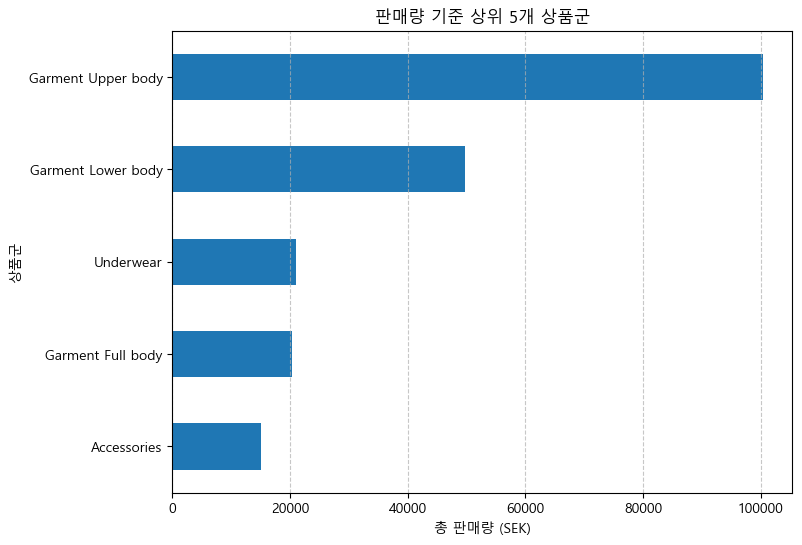

In [102]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')


top_products_1.plot(kind="barh", figsize=(8,6), title="판매량 기준 상위 5개 상품군")
plt.xlabel("총 판매량 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()




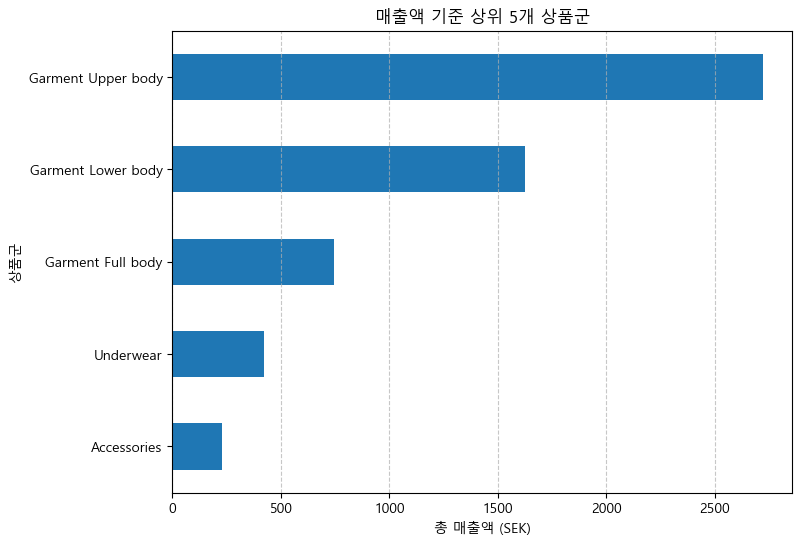

In [103]:
top_products_2.plot(kind="barh", figsize=(8,6), title="매출액 기준 상위 5개 상품군")
plt.xlabel("총 매출액 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

 하위 5개

In [104]:
#판매량 기준
bottom_products_1 = winter_df.groupby('Product_Group_Name').size().nsmallest(5)
print(bottom_products_1)


# 매출액 기준 
bottom_products_2 = winter_df.groupby('Product_Group_Name')["Revenue"].sum().nsmallest(5)
print(bottom_products_2)

Product_Group_Name
Garment and Shoe care     1
Underwear/nightwear       1
Cosmetic                 11
Furniture                21
Items                    36
dtype: int64
Product_Group_Name
Garment and Shoe care    0.016932
Underwear/nightwear      0.028898
Cosmetic                 0.051000
Furniture                0.140559
Items                    0.402966
Name: Revenue, dtype: float64


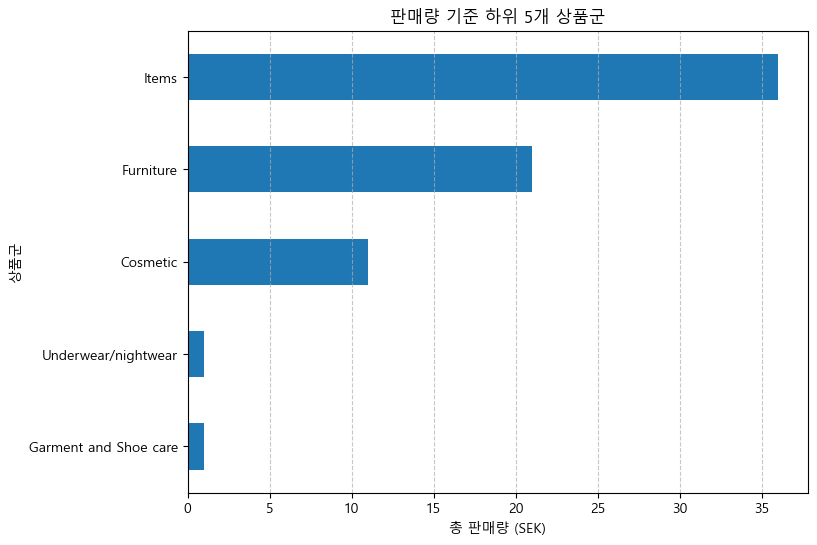

In [105]:
bottom_products_1.plot(kind="barh", figsize=(8,6), title="판매량 기준 하위 5개 상품군")
plt.xlabel("총 판매량 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

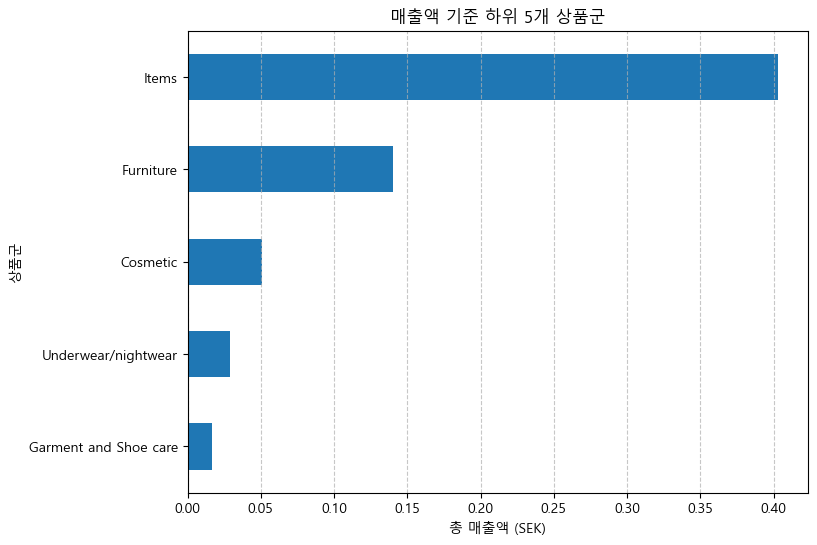

In [106]:
bottom_products_2.plot(kind="barh", figsize=(8,6), title="매출액 기준 하위 5개 상품군")
plt.xlabel("총 매출액 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

컬럼 Index_Group_Info

상위 5개

In [107]:
#판매량 기준
top_products_3 = winter_df.groupby('Index_Group_Info').size().nlargest(5)
print(top_products_3)


# 매출액 기준 
top_products_4 = analysis_master.groupby('Index_Group_Info')["Revenue"].sum().nlargest(5)
print(top_products_4)

Index_Group_Info
Ladieswear (1)       143802
Divided (2)           52925
Menswear (3)          14002
Baby/Children (4)     12059
Sport (26)             9422
dtype: int64
Index_Group_Info
Ladieswear (1)       14181.652788
Divided (2)           4803.358774
Menswear (3)          1135.267574
Sport (26)             825.625642
Baby/Children (4)      542.402863
Name: Revenue, dtype: float64


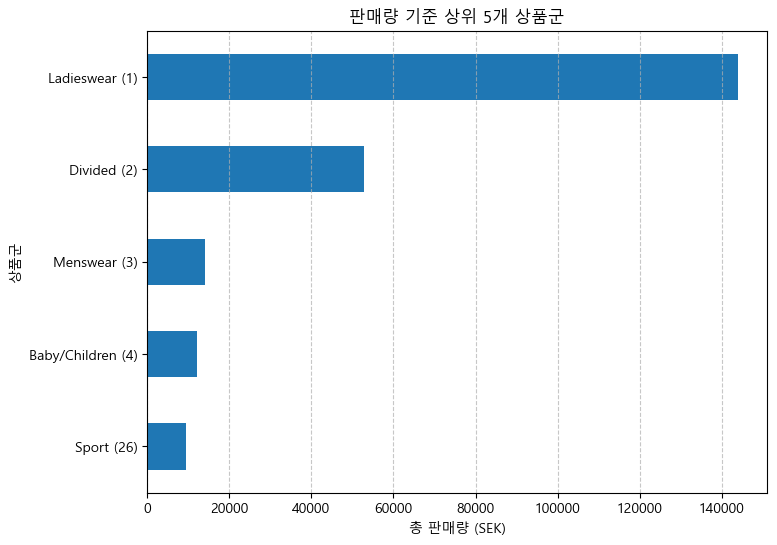

In [108]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

top_products_3.plot(kind="barh", figsize=(8,6), title="판매량 기준 상위 5개 상품군")
plt.xlabel("총 판매량 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

>> 11~2월 판매량 중 상위5개 상품군 각 비중 % 보기

매출 상위 5개 상품군이 전체 매출의 를 차지하며, 특히 ladieswear, divided가 높은 비중을 보입니다. 이는 특정 카테고리에 매출이 집중되는 현상을 보여주며, 재고 관리 및 프로모션 전략에서 우선순위를 고려해야 합니다.

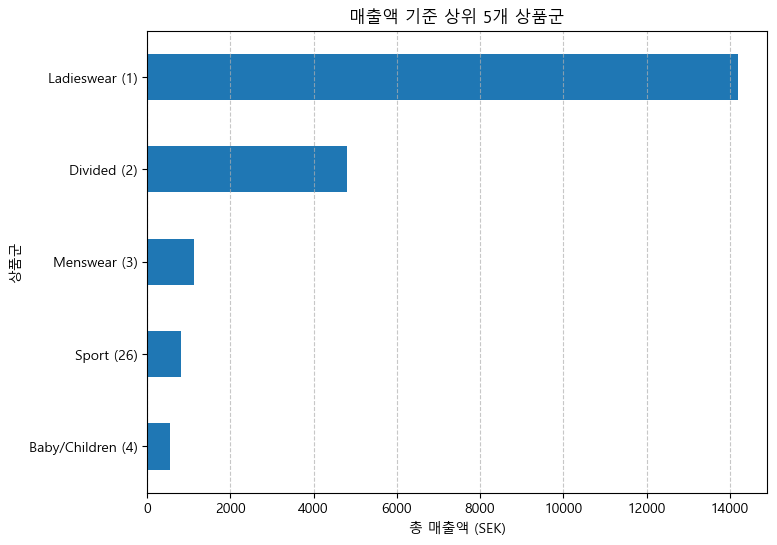

In [67]:
top_products_4.plot(kind="barh", figsize=(8,6), title="매출액 기준 상위 5개 상품군")
plt.xlabel("총 매출액 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

하위 5개

In [69]:
#판매량 기준
bottom_products_3 = winter_df.groupby('Index_Group_Info').size().nsmallest(5)
print(bottom_products_3)


# 매출액 기준 
bottom_products_4 = winter_df.groupby('Index_Group_Info')["Revenue"].sum().nsmallest(5)
print(bottom_products_4)

Index_Group_Info
Sport (26)             9422
Baby/Children (4)     12059
Menswear (3)          14002
Divided (2)           52925
Ladieswear (1)       143802
dtype: int64
Index_Group_Info
Baby/Children (4)     227.431474
Sport (26)            260.481508
Menswear (3)          386.957203
Divided (2)          1434.439863
Ladieswear (1)       4018.827875
Name: Revenue, dtype: float64


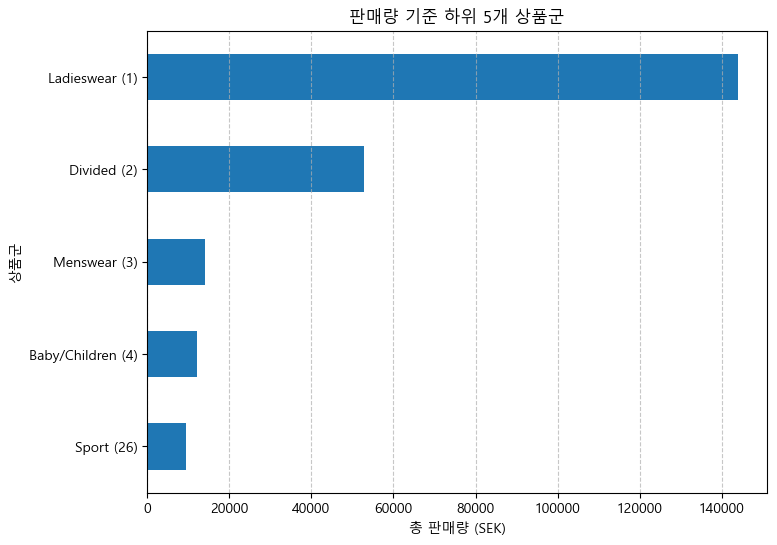

In [70]:
bottom_products_3.plot(kind="barh", figsize=(8,6), title="판매량 기준 하위 5개 상품군")
plt.xlabel("총 판매량 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

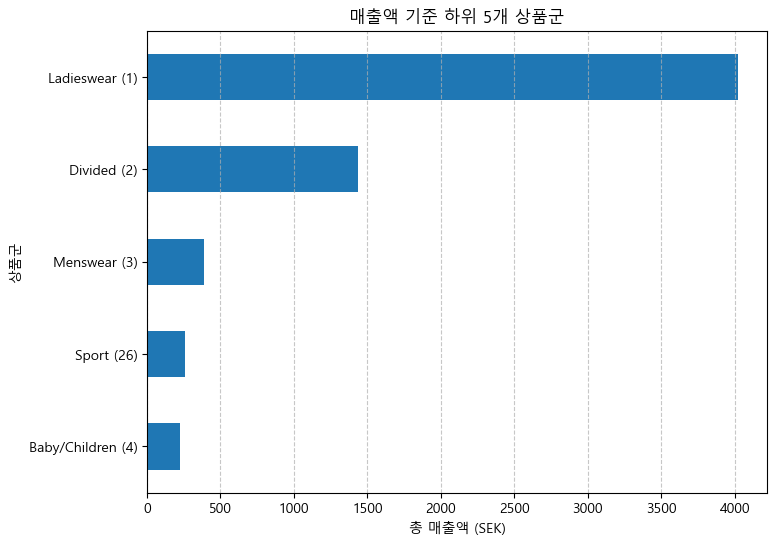

In [71]:
bottom_products_4.plot(kind="barh", figsize=(8,6), title="매출액 기준 하위 5개 상품군")
plt.xlabel("총 매출액 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Index_Group_Info > Product_Type_Info 세부사항으로 들어가서 상위/하위 5개 상품 분석

ladies

In [110]:
ladies_winter_df = winter_df[winter_df['Index_Group_Info'].str.contains('Ladieswear', case=False, na=False)]

print(len(ladies_winter_df))

ladies_winter_df.head()

143802


,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,...,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Is_Winter
7,2019-02-22,4c8c418805d81bd1d25d77659f227ac5570b154172ff8c...,651685004,0.016932,2,2,2019-02,02-22,0.016932,bottom_20,...,Trousers (272),Garment Lower body,All over pattern (1010001),Red (18),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),True
8,2019-02-22,0e5b7fc9a02c8d44a86575a66b571587fa5178f0705c7b...,751941002,0.036000,2,2,2019-02,02-22,0.172373,top_20,...,Trousers (272),Garment Lower body,Solid (1010016),Khaki green (20),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),True
15,2019-12-18,1097fb2500ac2013adbd27afa4650c22395144fa3700b1...,806477001,0.059305,2,12,2019-12,12-18,0.059305,middle,...,Jacket (262),Garment Upper body,Solid (1010016),Beige (11),Outwear (1201),Ladieswear (A),Ladieswear (1),Womens Jackets (19),Outdoor (1007),True
17,2019-12-17,14c451d245aca8792a7c5ba509d7997c2ae57e91f9332e...,762846008,0.022864,2,12,2019-12,12-17,0.226797,top_20,...,Shirt (259),Garment Upper body,Solid (1010016),Pink (4),Blouse (1515),Ladieswear (A),Ladieswear (1),Womens Tailoring (11),Blouses (1010),True
24,2019-12-16,b59a43f6c471c0e715e36634f2742c1d8ac9d15976d912...,399256001,0.016932,1,12,2019-12,12-16,0.016932,bottom_20,...,Trousers (272),Garment Lower body,Solid (1010016),Black (5),Everyday Waredrobe Denim (1779),Ladieswear (A),Ladieswear (1),Ladies Denim (57),Trousers Denim (1016),True


In [82]:
ladies_winter_df.shape

(143802, 28)

In [ ]:
#판매량 기준 상위/하위
ladies_winter_top = ladies_winter_df.groupby('Product_Type_Info').size().nlargest(5)
print(ladies_winter_top)

ladies_winter_bottom = ladies_winter_df.groupby('Product_Type_Info').size().nsmallest(5)
print(ladies_winter_bottom)

Product_Type_Info
Sweater (252)     20788
Trousers (272)    16074
Dress (265)       11594
Bra (306)          9041
Blouse (258)       9015
dtype: int64
Product_Type_Info
Sewing kit (489)          1
Outdoor trousers (276)    6
Headband (514)            7
Bra extender (291)        8
Mobile case (529)         9
dtype: int64


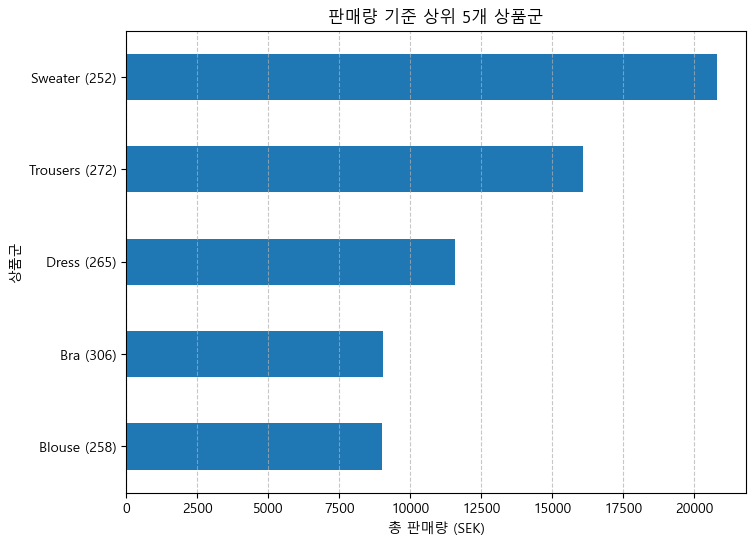

In [89]:
ladies_winter_top.plot(kind="barh", figsize=(8,6), title="판매량 기준 상위 5개 상품군")
plt.xlabel("총 판매량 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

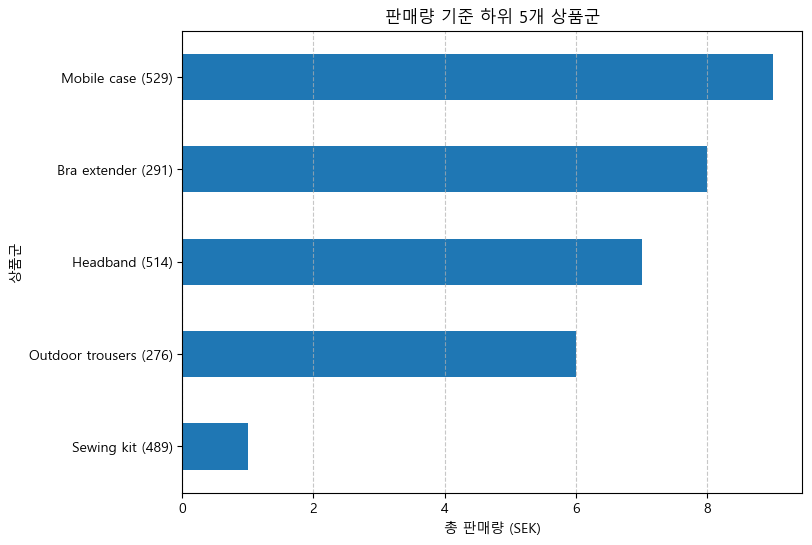

In [98]:
ladies_winter_bottom.plot(kind="barh", figsize=(8,6), title="판매량 기준 하위 5개 상품군")
plt.xlabel("총 판매량 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

ladies > Perceived_Colour_Master_Info / 색깔별

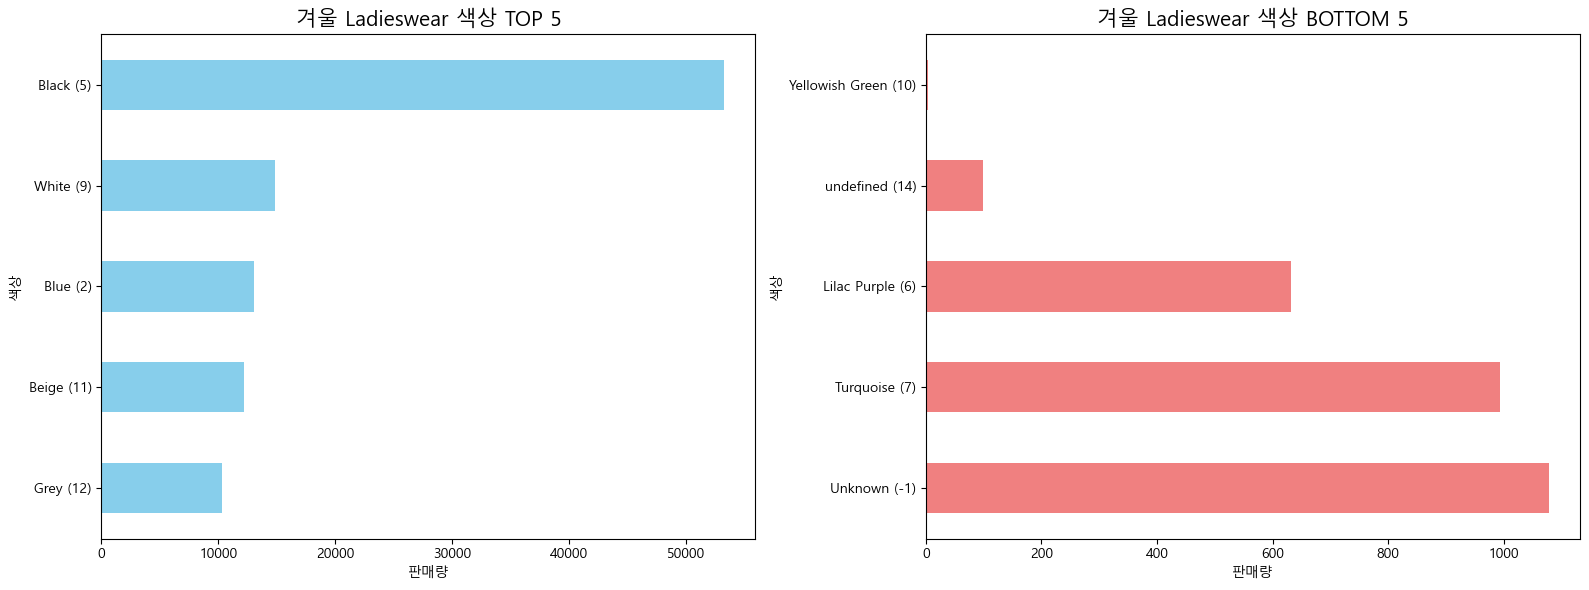

In [ ]:
## 아래 색깔별로 그래프 바꾸기##

ladies_color= ladies_winter_df.groupby('Perceived_Colour_Master_Info').size()

top_5_colors = ladies_color.nlargest(5)
bottom_5_colors = ladies_color.nsmallest(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


top_5_colors.sort_values().plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title("겨울 Ladieswear 색상 상위 5", fontsize=15)
ax1.set_xlabel("판매량")
ax1.set_ylabel("색상")


bottom_5_colors.sort_values(ascending=False).plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_title("겨울 Ladieswear 색상 하위 5", fontsize=15)
ax2.set_xlabel("판매량")
ax2.set_ylabel("색상")

plt.tight_layout()
plt.show()

ladies > Graphical_Appearance_Info / 패턴별

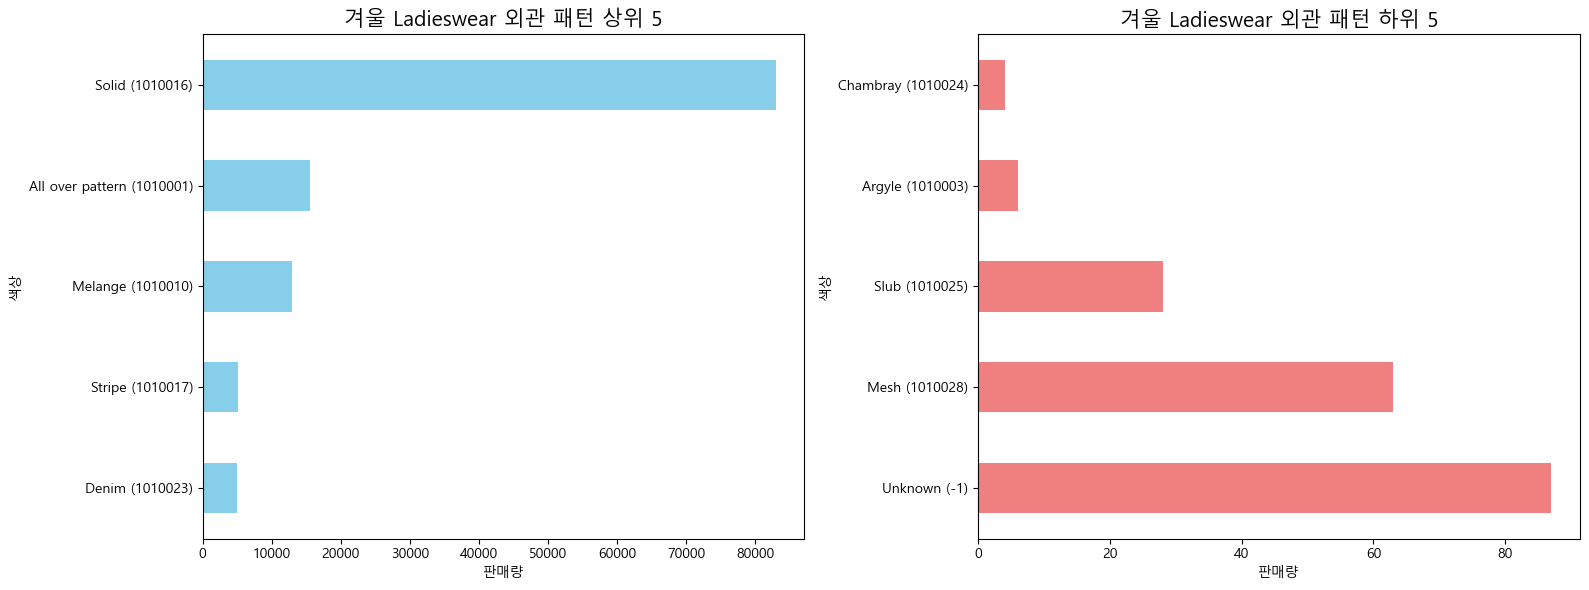

In [100]:
ladies_appear= ladies_winter_df.groupby('Graphical_Appearance_Info').size()

top_5_appear = ladies_appear.nlargest(5)
bottom_5_appear = ladies_appear.nsmallest(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


top_5_appear.sort_values().plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title("겨울 Ladieswear 외관 패턴 상위 5", fontsize=15)
ax1.set_xlabel("판매량")
ax1.set_ylabel("색상")


bottom_5_appear.sort_values(ascending=False).plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_title("겨울 Ladieswear 외관 패턴 하위 5", fontsize=15)
ax2.set_xlabel("판매량")
ax2.set_ylabel("색상")

plt.tight_layout()
plt.show()

Divided

In [86]:
divided_winter_df = winter_df[winter_df['Index_Group_Info'].str.contains('Divided', case=False, na=False)]

print(len(divided_winter_df))

divided_winter_df.head()

52925


,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,...,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Is_Winter
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,...,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005),True
31,2019-12-28,5093639ddeaa35a36c762bf8c7159349a941d18adae2d2...,679853021,0.010153,2,12,2019-12,12-28,0.162610,top_20,...,Sweater (252),Garment Upper body,Melange (1010010),White (9),Tops Knitwear (1647),Divided (D),Divided (2),Divided Collection (53),Knitwear (1003),True
34,2019-12-21,41da9113f20586073dcd11a08f0afb1ec363a2a5d4ff34...,698328007,0.004559,1,12,2019-12,12-21,0.004559,bottom_20,...,Sweater (252),Garment Upper body,Embroidery (1010007),Red (18),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005),True
35,2019-11-05,af009bb3c25a04b40141dccee0dbddae745f8605f2e560...,731160002,0.084729,2,11,2019-11,11-05,0.228763,top_20,...,Trousers (272),Garment Lower body,Denim (1010023),Green (19),Denim Trousers (1772),Divided (D),Divided (2),Ladies Denim (57),Trousers Denim (1016),True
41,2019-11-22,1b84d5d834ae530fe1f0dfdebb341c14f924dc437b23eb...,743633005,0.050831,2,11,2019-11,11-22,0.196508,top_20,...,Trousers (272),Garment Lower body,Denim (1010023),Blue (2),Denim Trousers (1772),Divided (D),Divided (2),Ladies Denim (57),Trousers Denim (1016),True


In [90]:
divided_winter_top = divided_winter_df.groupby('Product_Type_Info').size().nlargest(5)
print(divided_winter_top)

divided_winter_bottom = divided_winter_df.groupby('Product_Type_Info').size().nsmallest(5)
print(ladies_winter_bottom)

Product_Type_Info
Trousers (272)    13475
Sweater (252)      8160
Dress (265)        6051
T-shirt (255)      3180
Skirt (275)        2763
dtype: int64
Product_Type_Info
Sewing kit (489)          1
Outdoor trousers (276)    6
Headband (514)            7
Bra extender (291)        8
Mobile case (529)         9
dtype: int64


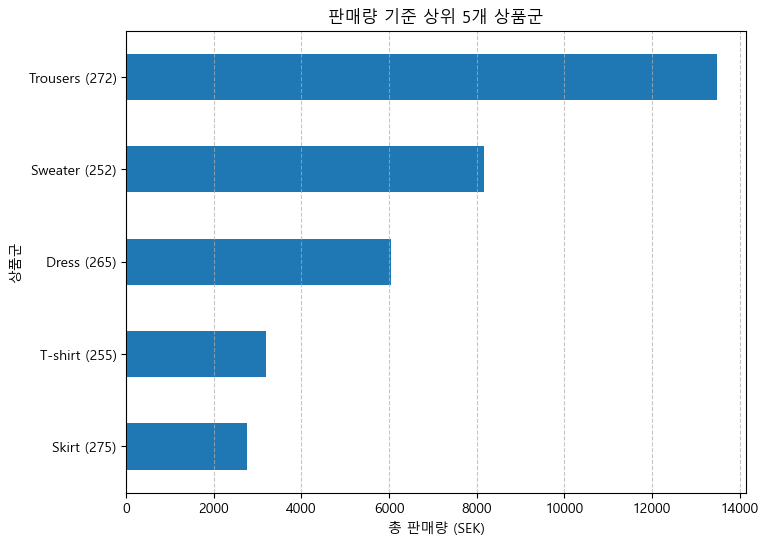

In [91]:
divided_winter_top.plot(kind="barh", figsize=(8,6), title="판매량 기준 상위 5개 상품군")
plt.xlabel("총 판매량 (SEK)")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()
